In [7]:
from META_TOOLBOX import *

# Knapsack instace selected by user
USER_INSTANCE = 'F1-LOWKP-10D'
D = KNAPSACK_DIMENSION(USER_INSTANCE)

# Input variables knapsakc problem
VARS = []
for I in range(D):
    VARS.append({'X': [0, 1]})

# Design space
X_L = [0.0] * D
X_U = [1.0] * D

# Setup FA method 
GAMMA = GAMMA_ASSEMBLY(X_L, X_U, D, 2)
PARAMETERS = {
              'ATTRACTIVENESS (BETA_0)': 0.98,
              'MIN. RANDOM FACTOR (ALPHA_MIN)': 0.20,
              'MAX. RANDOM FACTOR (ALPHA_MAX)': 0.95,
              'LIGHT ABSORPTION (GAMMA)': GAMMA,
              'THETA': 0.98,
              'TYPE ALPHA UPDATE': 'YANG 0',
              'SCALING (S_D)': True
             }
             
# Setup optimization
SETUP_FA = { 
              'N_REP': 10,
              'N_ITER': 200,
              'N_POP': 10,
              'D': D,
              'X_L': X_L,
              'X_U': X_U,
              'PARAMETERS': PARAMETERS,
              'NULL_DIC': {'X': VARS, 'INSTANCE': USER_INSTANCE, 'R_P': 10 ** 6}
            }

# OF statement and OF auxiliar
def OF_FUNCTION(X, NULL_DIC):
    DISCRETE_DATA = NULL_DIC['X']
    D = len(DISCRETE_DATA)
    X_NEW = CONVERT_CONTINUOUS_DISCRETE(X, DISCRETE_DATA)
    _, G_0, OF = KNAPSACK(X_NEW, NULL_DIC['INSTANCE'])
    PSEUDO_OF = OF + (np.maximum(0, G_0)) * NULL_DIC['R_P']
    
    return PSEUDO_OF

def OF_FUNCTION_AUX(X, NULL_DIC):
    DISCRETE_DATA = NULL_DIC['X']
    D = len(DISCRETE_DATA)
    X_NEW = CONVERT_CONTINUOUS_DISCRETE(X, DISCRETE_DATA)
    COST, G_0, OF = KNAPSACK(X_NEW, NULL_DIC['INSTANCE'])
    
    return COST, G_0, OF
    
# Optimization
RESULTS_REP_FA, BEST_REP_FA, AVERAGE_REP_FA, WORST_REP_FA, SATUS_FA = FIREFLY_ALGORITHM_001(OF_FUNCTION, SETUP_FA)

# Best dimension
BESTBEST_FA = SATUS_FA[0]
BEST = BEST_REP_FA[BESTBEST_FA]
DIMENSOES = list(BEST['X_POSITION'][-1,:])

# Design variables of optimum point
DATA_DISCRETE = SETUP_FA['NULL_DIC']['X']
X_NEW = CONVERT_CONTINUOUS_DISCRETE(DIMENSOES, DATA_DISCRETE)

# Best Result and Cost
COST, G_0, BEST_RESULT = OF_FUNCTION_AUX(DIMENSOES, SETUP_FA['NULL_DIC'])

# Print
print('\n Optimization results:', '\n \n',
      '- Design Variables: ', X_NEW, '\n',
      '- Profit($): {:.6e}'.format(-BEST_RESULT), '\n',
      '- Cost($): {:.6e}'.format(COST), '\n',
      '- Constraint: {:.6e}'.format(G_0))

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Process Time: 2.08 Seconds 
 Seconds per repetition: 0.21
META_FA001_REP_0_BEST_0_20230621 152423.xlsx
META_FA001_REP_1_BEST_1_20230621 152423.xlsx
META_FA001_REP_2_BEST_2_20230621 152423.xlsx
META_FA001_REP_3_BEST_3_20230621 152423.xlsx
META_FA001_REP_4_BEST_4_20230621 152423.xlsx
META_FA001_REP_5_BEST_5_20230621 152423.xlsx
META_FA001_REP_6_BEST_6_20230621 152423.xlsx
META_FA001_REP_7_BEST_7_20230621 152423.xlsx
META_FA001_REP_8_BEST_8_20230621 152423.xlsx
META_FA001_REP_9_BEST_9_20230621 152423.xlsx
META_FA001_RESUME_20230621 152423.xlsx

 Optimization results: 
 
 - Design Variables:  [0, 1, 1, 1, 0, 0, 0, 1, 1, 1] 
 - Profit($): 2.950000e+02 
 - Cost($): 2.690000e+02 
 - Constraint: 0.000000e+00


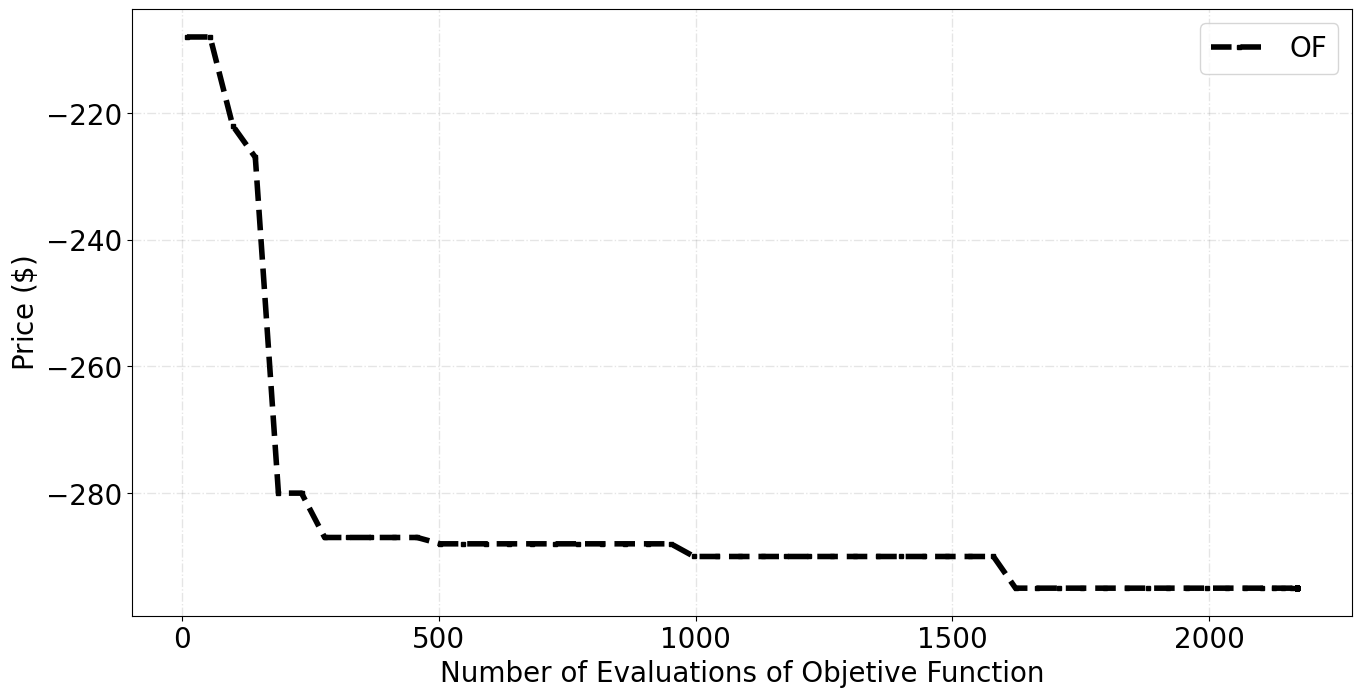

In [17]:
from EASYPLOT_TOOLBOX import *
# Graphics
LEGEND = ['OF']
LINE_STY = ['--']
COLORS = ['#000000']

# Chart setup
PLOT_SETUP = {
              'NAME': 'line chart',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'MARKER': 's',
              'MARKER SIZE': 3,
              'LINE WIDTH': 4,
              'LINE STYLE': LINE_STY,
              'Y AXIS LABEL': 'Price ($\$$)',
              'Y AXIS SIZE': 20,
              'X AXIS LABEL': 'Number of Evaluations of Objetive Function',
              'X AXIS SIZE': 20,
              'AXISES COLOR': '#000000',
              'LABELS SIZE': 20,
              'LABELS COLOR': '#000000',
              'CHART COLOR': COLORS,
              'ON GRID?': True,
              'LOC LEGEND': 'upper right',
              'SIZE LEGEND': 20,
              'Y LOG': False,
              'X LOG': False,
              'DPI': 600, 
              'EXTENSION': 'svg'
             }

# Data statement 
DATASET = {'X': list(BEST['NEOF']), 'Y': [list(BEST['OF'])], 'LEGEND': LEGEND}

# Call function
LINE_CHART(DATASET, PLOT_SETUP)